# Calibration 

## Determining beam center

The ideal method to determine the beam center is to use a calibrant. In the following example we will be using Silver Behenate (AgBeh) and `pyFAI`'s calibration GUI. Optionally, you could also find the beam by loading and plotting the image and finding the center manually. If using a calibrant to find the beam center, refer to `pyFAI`'s documentation here - https://pyfai.readthedocs.io/en/master/usage/cookbook/calib-gui/index.html. The GUI requires that you have PyQt5 installed (`pip install PyQt5`). 

### Experimental Settings

Once you have `pyFAI-calib2` open, fill in the right-hand side column with the calibrant details and detector type. Since our calibrant scattering image was taken with SMI's Pilatus 900KW we choose **Pilatus 900k** (`pyFAI` uses a different naming convention for this particular detector). If you happene to forget the beamline energy or wavelength used, you can read the images metadata bym

In [23]:
import fabio
img_path = './AgBeh Calibrant.tif'
img = fabio.open(img_path)
print(f"A wavelength of {img.header['Wavelength']} was used for the image: {img_path}")


A wavelength of 0.77012 A was used for the image: ./AgBeh Calibrant.tif


![](pyFAI-calib__experimental-settings.png)

### Masking

Accept the default mask by clicking next. If after running your analysis you find that you need a more precise mask, you can make further mask refinements and then save the mask by clicking on the floppy disk image on the top left. This will save the mask as an image file that can then be loaded within the SMI beamline package.

![](pyFAI-calib__masking.png)


### Peak Picking

Identify individual rings, making sure the ring number cooresponds to the appropriate peak. Ring numbering start from 1 from the center.

![](pyFAI-calib__peak-picking.png)


### Geometry Fitting

The calibrant example given was measured in transmission mode (`Rotation 2 = 0` and `Rotation 3 = 0`) with the detector rotated (`Roation 1 = 0.03054 radians`) to 1.75 deg relative to the sample. Given this, we can fill in the appropriate rotation values and "lock" them. Click "Fit" to fit to find the beam center. For more information on the difference between beam center and point-of-normal incidence refer to https://pyfai.readthedocs.io/en/master/geometry.html.

![](pyFAI-calib__geometry-fitting.png)

### Visualizing

From `pyFAI`'s calibration GUI `pyFAI-calib2`, we found a sample-to-detector distance of 282 mm and the x, y PONI coordinates

In [24]:
# sample-to-detector distance
SDD = 0.28167379969965517    # meters

# point of normal incidence x,y coordinates
PONI1 = 0.044658979267044076 # meters
PONI2 = 0.046453071845449390 # meters

To visuslize the scattering pattern we will use `plt.imshow(...)` which will display the image in pixel coordinates. To convert PONI1 and PONI2 we divide by the detectors pixel size (`img.header['Pixel_size']`)-- 172 $\mu m$/px in this case.

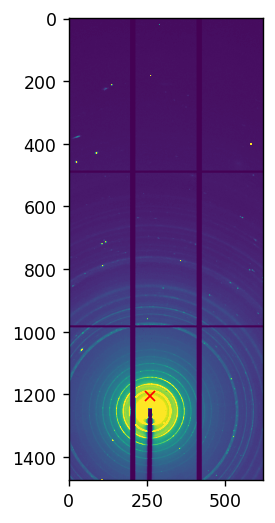

In [34]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(dpi=125)
plt.imshow(np.rot90(img.data), origin='upper', vmin=np.percentile(img.data, 1), vmax=np.percentile(img.data,99))

# re-adjust y-coordinate since origin=upper left
plt.plot(PONI1/(172e-6),img.data.shape[1]-PONI2/(172e-6), 'rx')
plt.show()

### Summary

#### Beamstop Coordinates

Using `pyFAI-calib2` within the masking tab, zoom into the top of the beamstop and hover the mouse over the top middle of the beamstop and record the coordinates at the bottom left of the screen. (X=229.224 px, Y=259.4632 px)

- SDD = 281.67 mm

- beam_center = (259.65 px, 1204.92 px)

- beam_stop = (259.5  px, 1245.78 px)